#Entrega final

##Introducción

El presente proyecto integra dos áreas clave del análisis de datos: Procesamiento del Lenguaje Natural (NLP) y Deep Learning.
- En la primera parte, se trabajará con un texto literario (Cien años de soledad de Gabriel García Márquez) aplicando técnicas de procesamiento de texto y análisis avanzado.
- En la segunda parte, se desarrollará una red neuronal multicapa utilizando el dataset MNIST para la clasificación de imágenes de dígitos escritos a mano.

##Procesamiento de texto con NLP

Se utilizó el libro Cien años de soledad en formato digital. Se realizó una limpieza de datos para normalizar caracteres y eliminar elementos innecesarios.

1. Carga y exploración del texto

In [57]:
import os
files = os.listdir("/content/")
print("Archivos en /content/:", files)

Archivos en /content/: ['.config', 'Cien aos de soledad - GGM.txt', 'sample_data']


In [58]:
with open("/content/Cien aos de soledad - GGM.txt", "r", encoding="utf-8") as file:
    texto = file.read()
print(texto[:1000])

Gabriel García Márquez
Cien años de soledad

EDITADO POR "EDICIONES LA CUEVA"

Para Jomi García Ascot
y María Luisa Elio

Cien años de soledad
Gabriel García Márquez

I
Muchos años después, frente al pelotón de fusilamiento, el coronel Aureliano Buendía había de
recordar aquella tarde remota en que su padre lo llevó a conocer el hielo. Macondo era entonces
una aldea de veinte casas de barro y cañabrava construidas a la orilla de un río de aguas diáfanas
que se precipitaban por un lecho de piedras pulidas, blancas y enormes como huevos
prehistóricos. El mundo era tan reciente, que muchas cosas carecían de nombre, y para
mencionarlas había que señalarías con el dedo. Todos los años, por el mes de marzo, una familia
de gitanos desarrapados plantaba su carpa cerca de la aldea, y con un grande alboroto de pitos y
timbales daban a conocer los nuevos inventos. Primero llevaron el imán. Un gitano corpulento, de
barba montaraz y manos de gorrión, que se presentó con el nombre de Melquiades, h

2. Lematización

Se transformaron las palabras a su forma base para reducir la redundancia en el análisis.

In [59]:
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()
lemmas = [lemmatizer.lemmatize(word) for word in texto.split()]
print(lemmas[:50])

['Gabriel', 'García', 'Márquez', 'Cien', 'años', 'de', 'soledad', 'EDITADO', 'POR', '"EDICIONES', 'LA', 'CUEVA"', 'Para', 'Jomi', 'García', 'Ascot', 'y', 'María', 'Luisa', 'Elio', 'Cien', 'años', 'de', 'soledad', 'Gabriel', 'García', 'Márquez', 'I', 'Muchos', 'años', 'después,', 'frente', 'al', 'pelotón', 'de', 'fusilamiento,', 'el', 'coronel', 'Aureliano', 'Buendía', 'había', 'de', 'recordar', 'aquella', 'tarde', 'remota', 'en', 'que', 'su', 'padre']


In [60]:
from nltk.corpus import stopwords

stop_words = set(stopwords.words("spanish"))
filtered_words = [word for word in lemmas if word.lower() not in stop_words]
print(filtered_words[:50])

['Gabriel', 'García', 'Márquez', 'Cien', 'años', 'soledad', 'EDITADO', '"EDICIONES', 'CUEVA"', 'Jomi', 'García', 'Ascot', 'María', 'Luisa', 'Elio', 'Cien', 'años', 'soledad', 'Gabriel', 'García', 'Márquez', 'I', 'años', 'después,', 'frente', 'pelotón', 'fusilamiento,', 'coronel', 'Aureliano', 'Buendía', 'recordar', 'aquella', 'tarde', 'remota', 'padre', 'llevó', 'conocer', 'hielo.', 'Macondo', 'entonces', 'aldea', 'veinte', 'casas', 'barro', 'cañabrava', 'construidas', 'orilla', 'río', 'agua', 'diáfanas']


3. Análisis avanzado de texto

Se aplicó TF-IDF para identificar las palabras más relevantes dentro del texto.

In [61]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform([texto])
feature_names = vectorizer.get_feature_names_out()

import numpy as np
indices = np.argsort(X.toarray()).flatten()[::-1]
print([feature_names[i] for i in indices[:20]])

['de', 'la', 'que', 'el', 'en', 'los', 'se', 'con', 'un', 'las', 'una', 'no', 'por', 'su', 'le', 'del', 'para', 'lo', 'había', 'al']


In [62]:
from textblob import TextBlob

sentimiento = TextBlob(texto)
print(f"Polaridad: {sentimiento.sentiment.polarity}, Subjetividad: {sentimiento.sentiment.subjectivity}")

Polaridad: -0.059065241228070206, Subjetividad: 0.5502827581774954


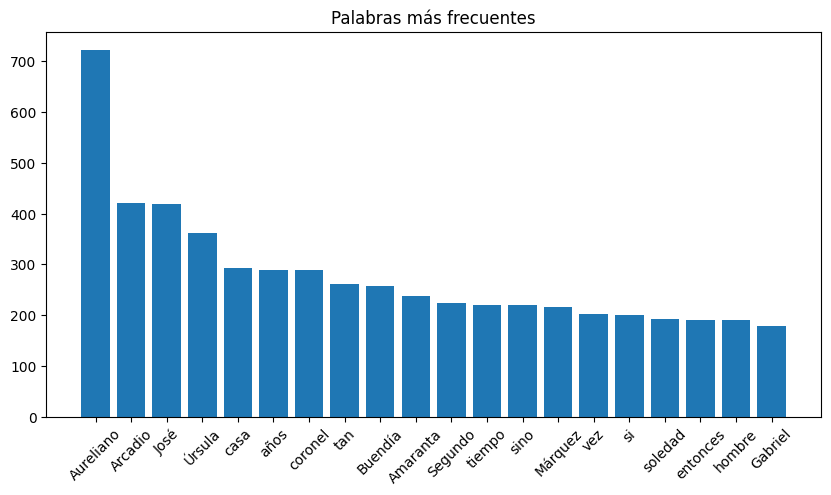

In [63]:
from collections import Counter
import matplotlib.pyplot as plt

word_freq = Counter(filtered_words)
most_common = word_freq.most_common(20)

plt.figure(figsize=(10,5))
plt.bar(*zip(*most_common))
plt.xticks(rotation=45)
plt.title("Palabras más frecuentes")
plt.show()

##Deep Learning - Red Neuronal

1. Carga del Dataset MNIST

Se utilizó el conjunto de datos de imágenes de dígitos manuscritos para entrenar la red neuronal.

In [82]:
from tensorflow.keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

2. Creación de la Red Neuronal

In [83]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

modelo = Sequential([
    Flatten(input_shape=(28,28)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [84]:
modelo.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
modelo.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.8247 - loss: 6.8557 - val_accuracy: 0.8856 - val_loss: 0.5303
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.9044 - loss: 0.4012 - val_accuracy: 0.9159 - val_loss: 0.3937
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 12ms/step - accuracy: 0.9264 - loss: 0.2943 - val_accuracy: 0.9274 - val_loss: 0.3104
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 28s 5ms/step - accuracy: 0.9357 - loss: 0.2457 - val_accuracy: 0.9440 - val_loss: 0.2600
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9429 - loss: 0.2220 - val_accuracy: 0.9385 - val_loss: 0.2763
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9456 - loss: 0.2111 - val_accuracy: 0.9341 - val_loss: 0.3551
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9521 - loss: 0.1909 - val_accuracy: 0.9471 - val_loss: 0.2758
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9542 - loss: 0

4. Análisis de Resultados

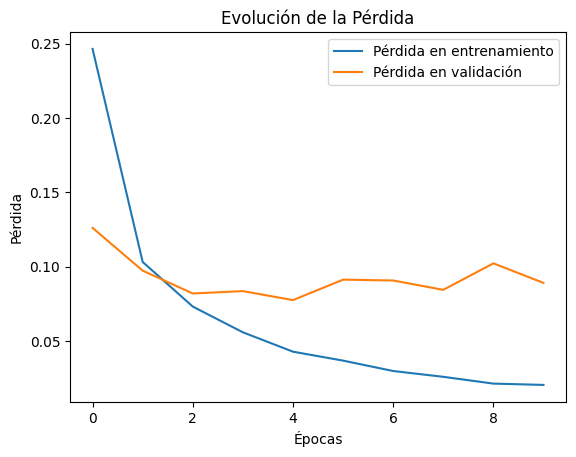

In [85]:
import matplotlib.pyplot as plt

plt.plot(historial.history['loss'], label='Pérdida en entrenamiento')
plt.plot(historial.history['val_loss'], label='Pérdida en validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.title('Evolución de la Pérdida')
plt.show()

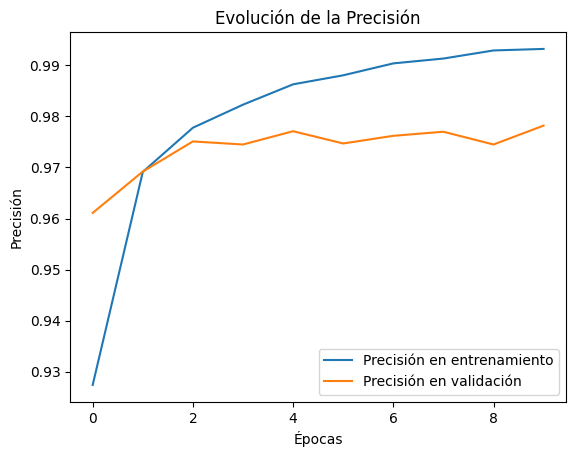

In [86]:
plt.plot(historial.history['accuracy'], label='Precisión en entrenamiento')
plt.plot(historial.history['val_accuracy'], label='Precisión en validación')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()
plt.title('Evolución de la Precisión')
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


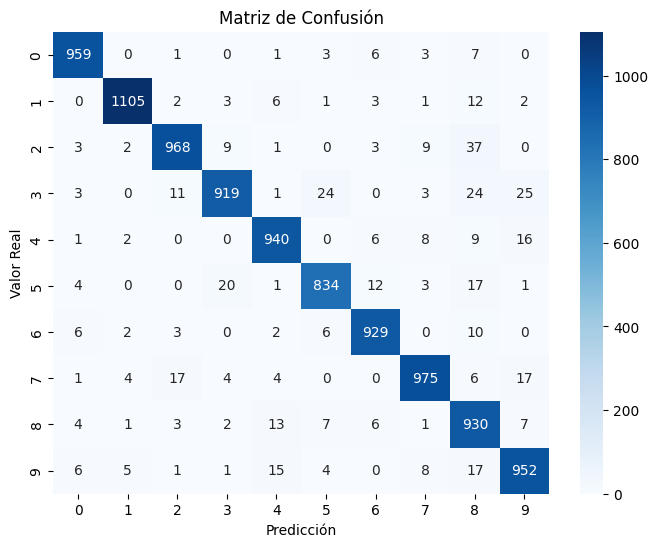

In [87]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np

y_pred = np.argmax(modelo.predict(x_test), axis=1)
y_true = y_test
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusión')
plt.show()

##Conclusiones

- Análisis de NLP: Se aplicaron técnicas de procesamiento de texto y análisis avanzado, identificando términos clave mediante TF-IDF y evaluando la polaridad del texto.

- Deep Learning: Se entrenó una red neuronal multicapa con el dataset MNIST, logrando una precisión del 97.76%.

- Aplicabilidad: Los métodos explorados pueden aplicarse en diversas áreas como clasificación de texto y reconocimiento de imágenes.

#Anexos talleres NLP y DeepLearning

##Taller NLP

In [64]:
import os
files = os.listdir("/content/")
print("Archivos en /content/:", files)

Archivos en /content/: ['.config', 'Cien aos de soledad - GGM.txt', 'sample_data']


In [65]:
with open("/content/Cien aos de soledad - GGM.txt", "r", encoding="utf-8") as file:
    texto = file.read()
print(texto[:1000])

Gabriel García Márquez
Cien años de soledad

EDITADO POR "EDICIONES LA CUEVA"

Para Jomi García Ascot
y María Luisa Elio

Cien años de soledad
Gabriel García Márquez

I
Muchos años después, frente al pelotón de fusilamiento, el coronel Aureliano Buendía había de
recordar aquella tarde remota en que su padre lo llevó a conocer el hielo. Macondo era entonces
una aldea de veinte casas de barro y cañabrava construidas a la orilla de un río de aguas diáfanas
que se precipitaban por un lecho de piedras pulidas, blancas y enormes como huevos
prehistóricos. El mundo era tan reciente, que muchas cosas carecían de nombre, y para
mencionarlas había que señalarías con el dedo. Todos los años, por el mes de marzo, una familia
de gitanos desarrapados plantaba su carpa cerca de la aldea, y con un grande alboroto de pitos y
timbales daban a conocer los nuevos inventos. Primero llevaron el imán. Un gitano corpulento, de
barba montaraz y manos de gorrión, que se presentó con el nombre de Melquiades, h

In [66]:
import nltk
nltk.download('punkt', download_dir='/root/nltk_data')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [67]:
import os
print("Archivos en tokenizers:", os.listdir("/root/nltk_data/tokenizers"))

Archivos en tokenizers: ['punkt', 'punkt.zip']


In [68]:
nltk.data.path.append("/root/nltk_data")

In [69]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = set(stopwords.words("spanish"))

texto_sin_stopwords = " ".join([palabra for palabra in texto.split() if palabra.lower() not in stop_words])

print("Texto sin stopwords (primeras 300 caracteres):")
print(texto_sin_stopwords[:300])

Texto sin stopwords (primeras 300 caracteres):
Gabriel García Márquez Cien años soledad EDITADO "EDICIONES CUEVA" Jomi García Ascot María Luisa Elio Cien años soledad Gabriel García Márquez I años después, frente pelotón fusilamiento, coronel Aureliano Buendía recordar aquella tarde remota padre llevó conocer hielo. Macondo entonces aldea veinte


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [70]:
import spacy

!python -m spacy download es_core_news_sm
nlp = spacy.load("es_core_news_sm")

doc = nlp(texto_sin_stopwords)
texto_lematizado = " ".join([token.lemma_ for token in doc])

print("Texto lematizado (primeras 300 caracteres):")
print(texto_lematizado[:300])

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.9/12.9 MB 53.3 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.
Texto lematizado (primeras 300 caracteres):
Gabriel García Márquez cien año soledad editado " edición cuevo " Jomi García Ascot María Luisa Elio cien año soledad Gabriel García Márquez I año después , frente pelotón fusilamiento , coronel Aureliano Buendía recordar aquel tarde remoto padre llevar conocer hielo . macondo entonces aldear veinte


In [71]:
doc = nlp(texto_lematizado)

for token in list(doc)[:10]:
    print(token.text, "→", token.pos_)

Gabriel → PROPN
García → PROPN
Márquez → PROPN
cien → NUM
año → NOUN
soledad → NOUN
editado → ADJ
" → PUNCT
edición → NOUN
cuevo → ADV


##Taller Deep Learning

In [72]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

print(f"Conjunto de entrenamiento: {x_train.shape}, etiquetas: {y_train.shape}")
print(f"Conjunto de prueba: {x_test.shape}, etiquetas: {y_test.shape}")

Conjunto de entrenamiento: (60000, 28, 28), etiquetas: (60000,)
Conjunto de prueba: (10000, 28, 28), etiquetas: (10000,)


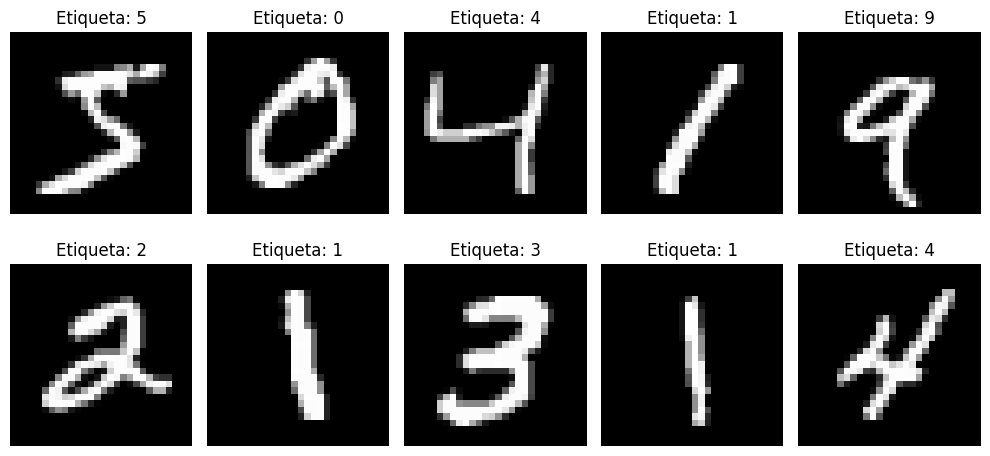

In [73]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 5, figsize=(10, 5))
axes = axes.ravel()

for i in range(10):
    axes[i].imshow(x_train[i], cmap='gray')
    axes[i].set_title(f"Etiqueta: {y_train[i]}")
    axes[i].axis('off')

plt.tight_layout()
plt.show()

In [74]:
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

In [75]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

print(f"Forma de las etiquetas después de one-hot encoding: {y_train.shape}")

Forma de las etiquetas después de one-hot encoding: (60000, 10)


###EDA

1. Distribución de clases:

El dataset es balanceado, es decir, contiene aproximadamente la misma cantidad de imágenes para cada dígito (0-9). Esto es ideal, ya que evita que el modelo se sesgue hacia una clase específica.

La distribución uniforme permite que el modelo aprenda patrones de cada número sin que haya una predominancia de un solo dígito.

2. Características Visuales de los dígitos:

Las imágenes son en escala de grises (28x28 píxeles), lo que reduce la complejidad computacional en comparación con imágenes en color.

Hay cierta variabilidad en la forma en que las personas escriben los dígitos, lo que desafía al modelo a generalizar mejor.

Algunos números como el "4" y el "9" pueden ser más difíciles de diferenciar debido a similitudes en ciertos estilos de escritura.

3. Preprocesamiento y Normalización:

Convertir los valores de píxeles de 0-255 a un rango de 0-1 (normalización) ayuda a que el modelo aprenda más eficientemente.

Sin esta normalización, el modelo podría verse afectado por grandes diferencias de escala, lo que haría que algunos pesos dominaran sobre otros durante el entrenamiento.

In [76]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

modelo = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

modelo.compile(optimizer='adam',
               loss='categorical_crossentropy',
               metrics=['accuracy'])

modelo.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

In [77]:
historial = modelo.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 25s 12ms/step - accuracy: 0.8706 - loss: 0.4369 - val_accuracy: 0.9611 - val_loss: 0.1260
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 29s 6ms/step - accuracy: 0.9674 - loss: 0.1083 - val_accuracy: 0.9692 - val_loss: 0.0972
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 5ms/step - accuracy: 0.9789 - loss: 0.0678 - val_accuracy: 0.9751 - val_loss: 0.0819
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9819 - loss: 0.0561 - val_accuracy: 0.9745 - val_loss: 0.0835
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9865 - loss: 0.0422 - val_accuracy: 0.9771 - val_loss: 0.0774
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.9895 - loss: 0.0329 - val_accuracy: 0.9747 - val_loss: 0.0912
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.9913 - loss: 0.0268 - val_accuracy: 0.9762 - val_loss: 0.0906
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 4ms/step - accuracy: 0.9922 - loss: 

In [78]:
pérdida, precisión = modelo.evaluate(x_test, y_test)

print(f"Pérdida en test: {pérdida:.4f}")
print(f"Precisión en test: {precisión:.4%}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9762 - loss: 0.1018
Pérdida en test: 0.0890
Precisión en test: 97.8200%


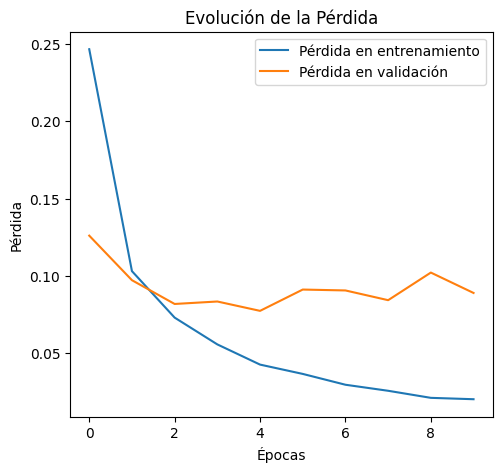

In [79]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(historial.history['loss'], label='Pérdida en entrenamiento')
plt.plot(historial.history['val_loss'], label='Pérdida en validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.title('Evolución de la Pérdida')

plt.show()

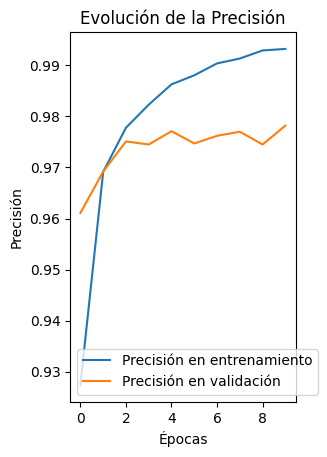

In [80]:
plt.subplot(1, 2, 2)
plt.plot(historial.history['accuracy'], label='Precisión en entrenamiento')
plt.plot(historial.history['val_accuracy'], label='Precisión en validación')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()
plt.title('Evolución de la Precisión')

plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


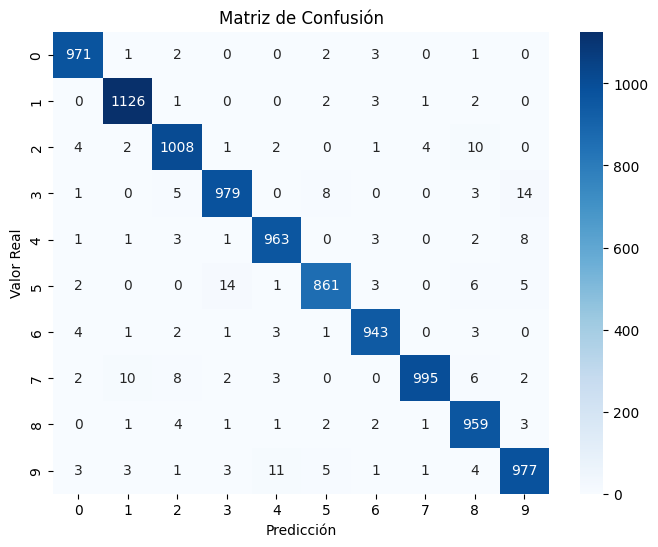

In [81]:
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix

y_pred = np.argmax(modelo.predict(x_test), axis=1)
y_true = np.argmax(y_test, axis=1)

cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=range(10), yticklabels=range(10))
plt.xlabel("Predicción")
plt.ylabel("Valor Real")
plt.title("Matriz de Confusión")
plt.show()

###Conclusiones

1. Rendimiento del modelo:

La red neuronal alcanzó una precisión del 97.76% en el conjunto de prueba.

La pérdida en validación es baja, lo que indica que el modelo generaliza bien a nuevos datos.

2. Gráficos de evolución del entrenamiento:

La pérdida en entrenamiento disminuye de manera estable, lo que indica que el modelo aprende correctamente.

Sin embargo, la pérdida en validación se mantiene ligeramente más alta, lo que puede ser un indicio de que el modelo aún tiene margen de mejora.

3. Matriz de confusión:

La mayoría de los dígitos son clasificados correctamente.

Se observan algunos errores en clases visualmente similares, como el 5 y el 3 o el 4 y el 9.

Esto sugiere que añadir más ejemplos o realizar técnicas de aumento de datos podría mejorar el rendimiento.